### sequentialfeatureselector (特徵選擇)
- https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#sequentialfeatureselector-the-popular-forward-and-backward-feature-selection-approaches-including-floating-variants
https://museotoolbox.readthedocs.io/en/latest/auto_examples/ai/SFFS.html

In [1]:
# !pip install mlxtend 
# !pip install museotoolbox

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from collections import Counter

# from museotoolbox.ai import SequentialFeatureSelection
# from museotoolbox.cross_validation import LeavePSubGroupOut
# from museotoolbox import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
df = pd.read_csv('mother_data_md220828_clean(BS 100)(0,1).csv')


# features = pd.read_csv('0927 70 features.csv')
# features_list = features['features'].tolist()

X = df.drop('BS-mg/dL', axis=1)
y = df['BS-mg/dL']
# X.info()
X.columns

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 28) # , stratify=y


In [6]:
!pip install imbalanced-learn

In [7]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler() # sampling_strategy=0.5
X_under, y_under = under.fit_resample(X_train, y_train)
print(Counter(y_under))

Counter({0: 899, 1: 899})


In [8]:
# X_col = X.columns

# sfs_rfc = [18, 19, 71, 98, 125, 127, 130, 132, 160, 168, 169, 180, 181, 182, 183, 184, 185, 186, 187, 188]
# df_sfs_rfc = []
# for i in sfs_rfc:
#     df_sfs_rfc.append(X_col[i])
# print('sfs_rsf: \n', df_sfs_rfc)
# dfdf_sfs_rfc = pd.DataFrame(df_sfs_rfc)
# dfdf_sfs_rfc.columns = ['features']
# dfdf_sfs_rfc.to_csv('1014 sfs_rfc_features.csv', index=None)

# sbs_rfc = [4, 14, 28, 37, 46, 63, 75, 92, 100, 114, 121, 135, 136, 158, 166, 170, 183, 185, 188, 189]
# df_sbs_rfc = []
# for i in sbs_rfc:
#     df_sbs_rfc.append(X_col[i])
# print('sfs_rsf: \n', df_sbs_rfc)
# dfdf_sbs_rfc = pd.DataFrame(df_sbs_rfc)
# dfdf_sbs_rfc.columns = ['features']
# dfdf_sbs_rfc.to_csv('1014 sbs_rfc_features.csv', index=None)

# sffs_rfc = [18, 24, 41, 59, 79, 80, 127, 140, 141, 166, 173, 180, 181, 182, 183, 184, 186, 187, 188, 189]
# df_sffs_rfc = []
# for i in sffs_rfc:
#     df_sffs_rfc.append(X_col[i])
# print('sfs_rsf: \n', df_sffs_rfc)
# dfdf_sffs_rfc = pd.DataFrame(df_sffs_rfc)
# dfdf_sffs_rfc.columns = ['features']
# dfdf_sffs_rfc.to_csv('1014 sffs_rfc_features.csv', index=None)

### Example 1 - A simple Sequential Forward Selection example

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

clf = RandomForestClassifier(n_estimators = 100)

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# sfs1 = SFS(clf, 
#            k_features=20, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=0,
#            n_jobs=10)

# sfs1 = sfs1.fit(X, y)

#### 通過 subsets_ 屬性，我們可以查看每一步選擇的特徵索引：

In [11]:
# print(sfs1.subsets_)

In [12]:
# # feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
# sfs1 = sfs1.fit(X, y, custom_feature_names=X.columns)
# sfs1.subsets_

In [13]:
# type(sfs1.subsets_)
# sfs1_df = pd.DataFrame.from_dict(sfs1.subsets_)
# sfs1_df.to_csv('1013 sfs1_rfc_df_20 features.csv', index = None)

### Example 2 - Toggling between SFS, SBS, SFFS, and SBFS

In [14]:
# Sequential Forward Selection
sfs = SFS(clf, 
          k_features=20, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=10)
sfs = sfs.fit(X_under, y_under)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(clf, 
          k_features=20, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=10)
sbs = sbs.fit(X_under, y_under)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(clf, 
           k_features=20, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=10)
sffs = sffs.fit(X_under, y_under)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(clf, 
           k_features=20, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=10)
sbfs = sbfs.fit(X_under, y_under)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(77, 83, 110, 144, 155, 157, 160, 162, 169, 173, 180, 181, 182, 183, 184, 185, 186, 188, 189, 193)
CV Score:
0.6980103934669637

Sequential Backward Selection (k=3):
(6, 12, 21, 28, 37, 38, 39, 47, 61, 85, 90, 104, 123, 135, 142, 143, 163, 164, 182, 183)
CV Score:
0.6496151942588468

Sequential Forward Floating Selection (k=3):
(4, 18, 24, 65, 93, 127, 144, 155, 157, 161, 169, 180, 181, 182, 183, 184, 185, 188, 189, 192)
CV Score:
0.7024486513239298

Sequential Backward Floating Selection (k=3):
(3, 5, 22, 24, 26, 42, 63, 64, 82, 100, 143, 144, 155, 162, 163, 182, 183, 184, 188, 189)
CV Score:
0.6763115565454095


### Example 3 - Visualizing the results in DataFrames

In [15]:
import pandas as pd
# Below, we see the DataFrame of the Sequential Forward Selector from Example 2:b
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(184,)","[0.6511111111111111, 0.68, 0.6258351893095768,...",0.65015,"(BMI,)",0.031303,0.019528,0.011275
2,"(181, 184)","[0.6755555555555556, 0.72, 0.6614699331848553,...",0.688533,"(old, BMI)",0.035524,0.022161,0.012795
3,"(181, 184, 189)","[0.6888888888888889, 0.7266666666666667, 0.692...",0.694646,"(old, BMI, recode_T)",0.03257,0.020318,0.011731
4,"(173, 181, 184, 189)","[0.6866666666666666, 0.7377777777777778, 0.717...",0.701879,"(Entropy_Multiscale_AUC, old, BMI, recode_T)",0.044235,0.027596,0.015932
5,"(173, 181, 184, 188, 189)","[0.6755555555555556, 0.7333333333333333, 0.721...",0.704115,"(Entropy_Multiscale_AUC, old, BMI, diabetes, r...",0.038476,0.024003,0.013858
6,"(77, 173, 181, 184, 188, 189)","[0.6977777777777778, 0.7466666666666667, 0.706...",0.715231,"(medianQR_intv, Entropy_Multiscale_AUC, old, B...",0.029994,0.018711,0.010803
7,"(77, 173, 180, 181, 184, 188, 189)","[0.6755555555555556, 0.7555555555555555, 0.701...",0.715239,"(medianQR_intv, Entropy_Multiscale_AUC, sex, o...",0.047805,0.029823,0.017218
8,"(77, 173, 180, 181, 184, 186, 188, 189)","[0.6844444444444444, 0.7466666666666667, 0.717...",0.714682,"(medianQR_intv, Entropy_Multiscale_AUC, sex, o...",0.035494,0.022143,0.012784
9,"(77, 173, 180, 181, 183, 184, 186, 188, 189)","[0.6688888888888889, 0.7622222222222222, 0.701...",0.710228,"(medianQR_intv, Entropy_Multiscale_AUC, sex, o...",0.053714,0.033509,0.019346
10,"(77, 173, 180, 181, 183, 184, 185, 186, 188, 189)","[0.68, 0.7422222222222222, 0.7193763919821826,...",0.713017,"(medianQR_intv, Entropy_Multiscale_AUC, sex, o...",0.035754,0.022305,0.012878


In [16]:
# Now, let's compare it to the Sequential Backward Selector:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
194,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6288888888888889, 0.64, 0.6258351893095768,...",0.628469,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.012072,0.007531,0.004348
193,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6422222222222222, 0.6511111111111111, 0.690...",0.656852,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.031537,0.019674,0.011359
192,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6644444444444444, 0.6577777777777778, 0.650...",0.654609,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.01137,0.007093,0.004095
191,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6488888888888888, 0.6688888888888889, 0.670...",0.656282,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.022459,0.014011,0.008089
190,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6466666666666666, 0.6688888888888889, 0.668...",0.657953,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.016963,0.010582,0.00611
...,...,...,...,...,...,...,...
24,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 66, 85...","[0.6155555555555555, 0.6488888888888888, 0.657...",0.645732,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.028849,0.017997,0.010391
23,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.6577777777777778, 0.6688888888888889, 0.668...",0.657947,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.020651,0.012883,0.007438
22,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.6355555555555555, 0.6555555555555556, 0.661...",0.647388,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.018163,0.011331,0.006542
21,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.62, 0.6622222222222223, 0.688195991091314, ...",0.653518,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.040067,0.024996,0.014431


In [17]:
# 上面數據幀中的列表示計算的交叉驗證分數周圍的置信區間。默認情況下，使用95%的置信區間，但我們可以通過參數使用不同的置信區間。例如，90% 置信區間的置信區間的置信區間可以按如下方式獲得：
pd.DataFrame.from_dict(sbs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
194,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6288888888888889, 0.64, 0.6258351893095768,...",0.628469,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.009269,0.007531,0.004348
193,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6422222222222222, 0.6511111111111111, 0.690...",0.656852,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.024215,0.019674,0.011359
192,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6644444444444444, 0.6577777777777778, 0.650...",0.654609,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.00873,0.007093,0.004095
191,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6488888888888888, 0.6688888888888889, 0.670...",0.656282,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.017245,0.014011,0.008089
190,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6466666666666666, 0.6688888888888889, 0.668...",0.657953,"(RMSSD, meanNN, sdNN, cvNN, CVSD, medianNN, ma...",0.013025,0.010582,0.00611
...,...,...,...,...,...,...,...
24,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 66, 85...","[0.6155555555555555, 0.6488888888888888, 0.657...",0.645732,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.022151,0.017997,0.010391
23,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.6577777777777778, 0.6688888888888889, 0.668...",0.657947,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.015857,0.012883,0.007438
22,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.6355555555555555, 0.6555555555555556, 0.661...",0.647388,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.013946,0.011331,0.006542
21,"(6, 12, 21, 28, 31, 37, 38, 39, 47, 61, 85, 90...","[0.62, 0.6622222222222223, 0.688195991091314, ...",0.653518,"(madNN, HFn, ecg_sq_ALLmean, ecg_Q_intervals, ...",0.030765,0.024996,0.014431


### Example 4 - Plotting the results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed: 15.4min finished

[2022-10-15 12:00:33] Features: 1/20 -- score: 0.887063953637802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed: 10.5min finished

[2022-10-15 12:11:03] Features: 2/20 -- score: 0.8870640050416936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  9.7min finished

[2022-10-15 12:20:48] Features: 3/20 -- score: 0.8870640050416936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

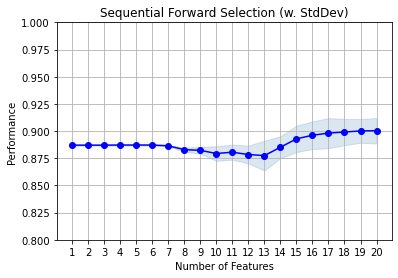

In [18]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(clf, 
          k_features=20, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()